In [1]:
# importing the necessary libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve,precision_recall_curve,auc,make_scorer
from sklearn.model_selection import StratifiedKFold

import warnings
warnings.filterwarnings("ignore")

In [2]:
# get the data and save it in a dataframe.
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
# check the number of missing values for each column.
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
# dropping the column 'customerID' as it has nominal data to identify customers.
df.drop(columns=['customerID'],inplace=True)

In [6]:
# check for duplicates.
df.duplicated().value_counts()

# there are some duplicate entries.

False    7021
True       22
dtype: int64

In [7]:
# drop the duplicate rows.
df.drop_duplicates(inplace=True,ignore_index=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7021 entries, 0 to 7020
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 


In [9]:
# The numerical data in 'TotalCharges' column is in string format.
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [10]:
# 11 entries in 'TotalCharges' column are space strings.
df[df['TotalCharges']==' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1081,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1338,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3323,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3817,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4370,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5207,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6652,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
# converting the 'TotalCharges' column to numeric format. The space strings are automatically converted to null values.
df['TotalCharges']= pd.to_numeric(df['TotalCharges'],errors='coerce')
df['TotalCharges'].isnull().sum()

11

In [12]:
# Filling the missing 11 values with mean.
df['TotalCharges']= df['TotalCharges'].fillna(df['TotalCharges'].mean())
df['TotalCharges'].isnull().sum()

0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7021 entries, 0 to 7020
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 


# Let us see some plots of our dataset.

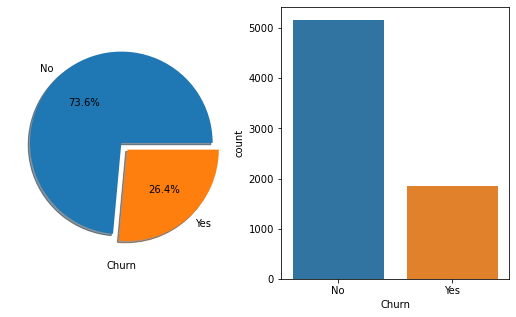

In [14]:
# Plot of target variable i.e. 'Churn'.
f,ax=plt.subplots(1,2,figsize=(9,5))
df['Churn'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_ylabel('')
ax[0].set_xlabel('Churn')
sns.countplot(df['Churn'],ax=ax[1])
plt.show()

# The target column is moderately imbalanced.

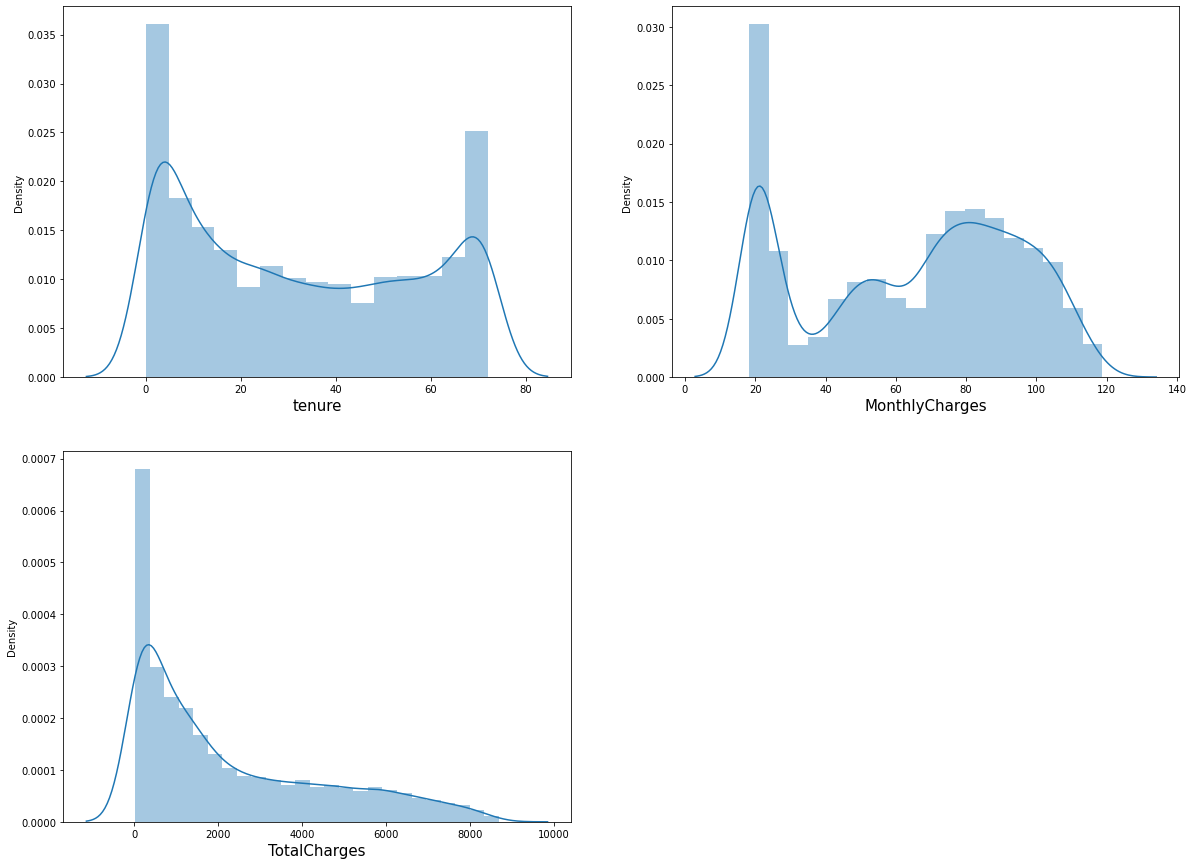

In [15]:
# Distribution plots of the features with continuous data.
df_cont=df[['tenure', 'MonthlyCharges','TotalCharges']]
plt.figure(figsize=(20,15))
plotnumber=1
for column in df_cont:
    if plotnumber<=4:
        ax= plt.subplot(2,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

# Observations:
# 1.'TotalCharges' column has right-skewed distribution.

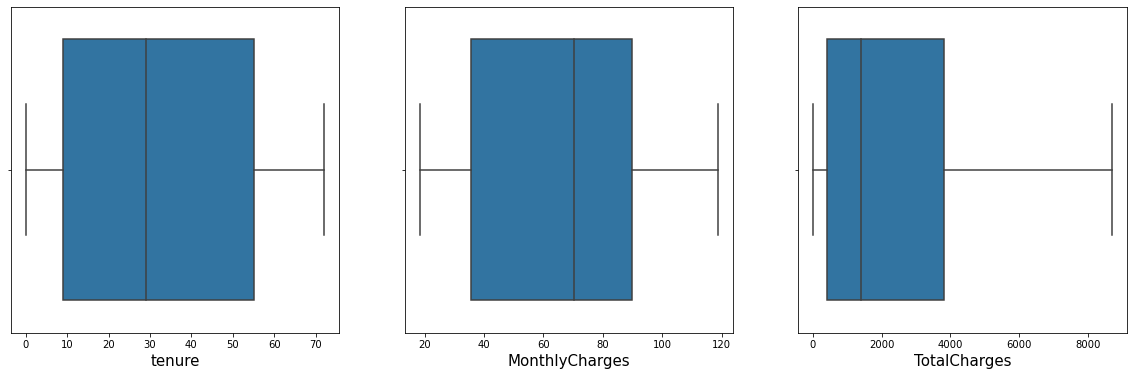

In [16]:
# # Now let's see the box-plots of the above features.
plt.figure(figsize=(20,6))
plotnumber=1
for column in df_cont:
    if plotnumber<=3:
        ax= plt.subplot(1,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

# Observations:
# 1. No outliers could be seen in the boxplots.

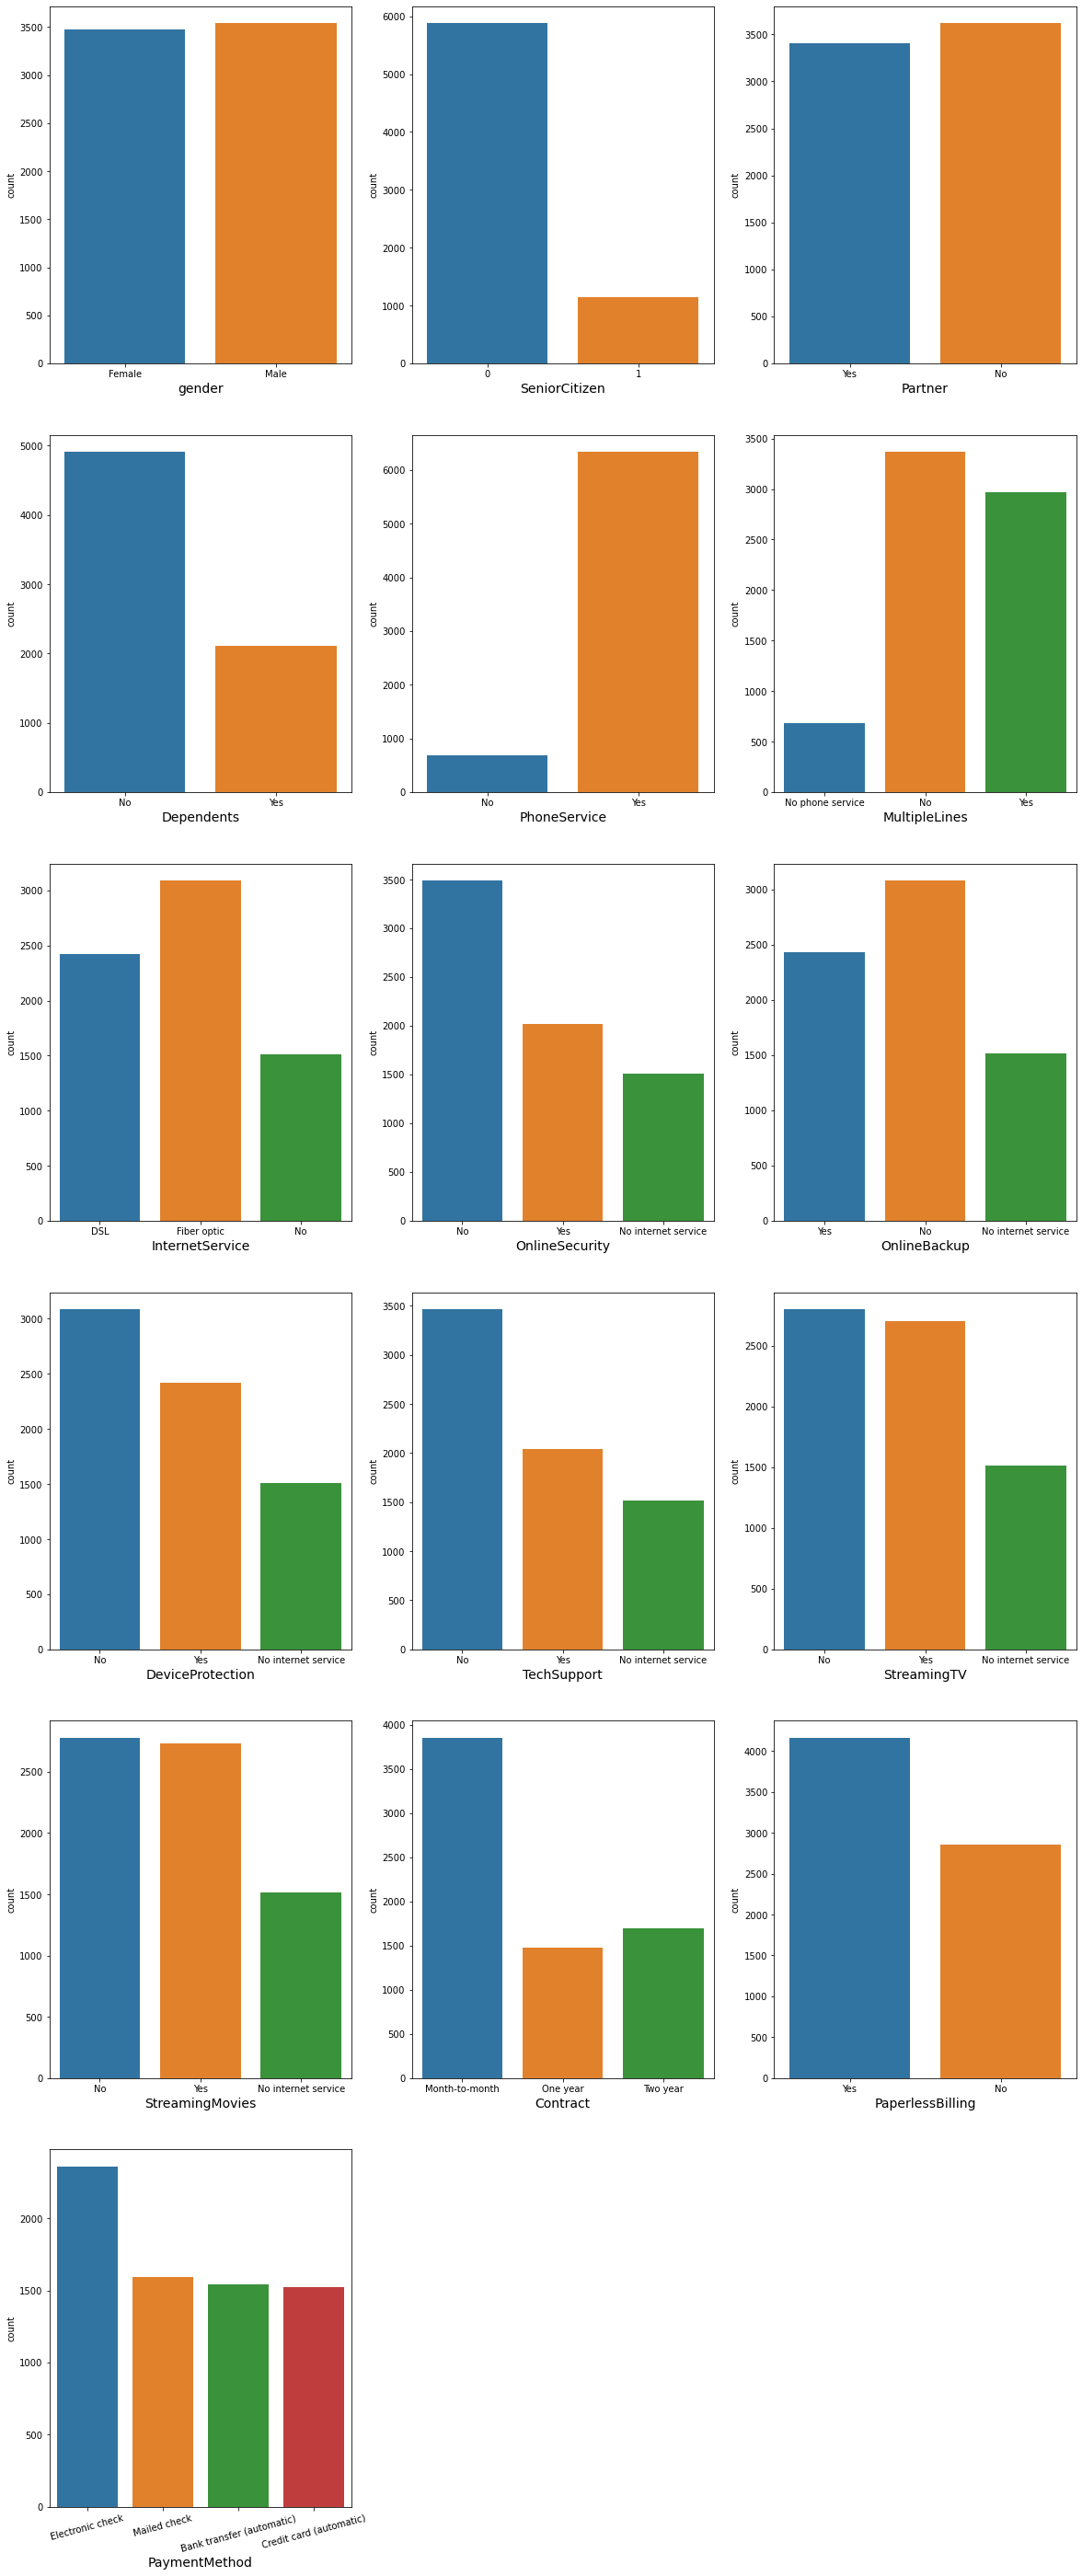

In [17]:
# Count-plots of the features with categorical data.
df_cat=df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService', 
           'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies', 'Contract', 
           'PaperlessBilling', 'PaymentMethod']]
plt.figure(figsize=(20,50))
plotnumber=1
for column in df_cat:
    if plotnumber<=16:
        ax= plt.subplot(6,3,plotnumber)
        sns.countplot(df[column])
        plt.xlabel(column,fontsize=14)
        if column == 'PaymentMethod':
            plt.xticks(rotation=15)
    plotnumber+=1
plt.show()

# Observations:
# 1. A high majority of customers have phone service.
# 2. Fibre-optic is the most used internet service.
# 3. Majority of the customers prefer month-to-month contract.
# 4. Majority of the customers use paperless billing.

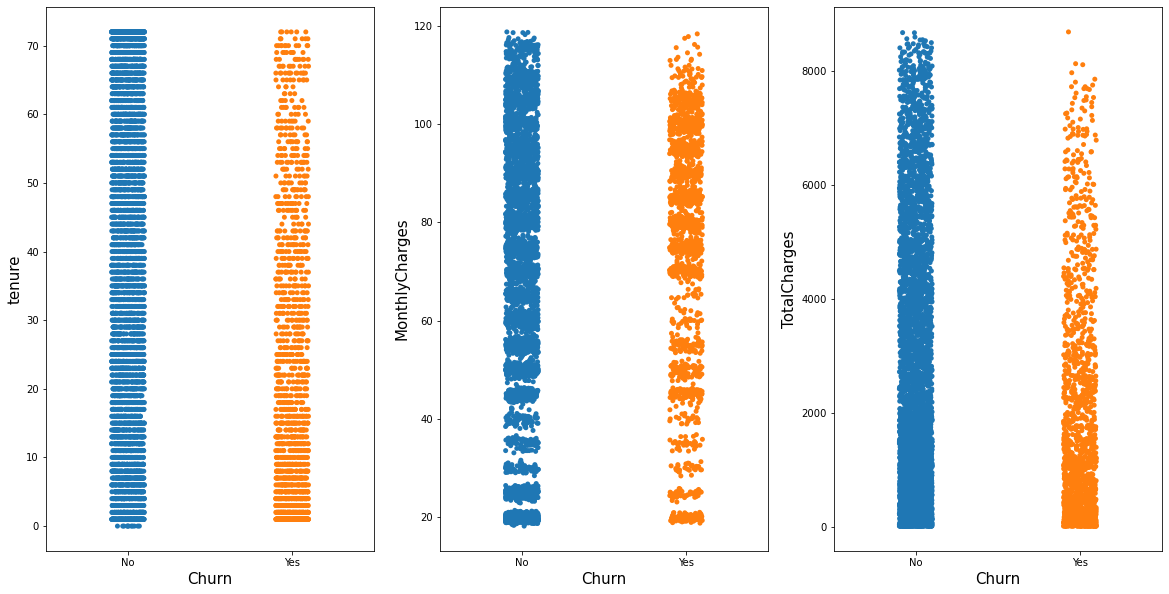

In [18]:
# Let's see the stripplot of our continuous numeric features wrt the target variable i.e 'Churn'
plt.figure(figsize=(20,10))
for i in enumerate(df_cont):
    plt.subplot(1,3,i[0]+1)
    sns.stripplot(x='Churn',y=i[1],data=df)
    plt.xlabel('Churn',fontsize=15)
    plt.ylabel(i[1],fontsize=15)

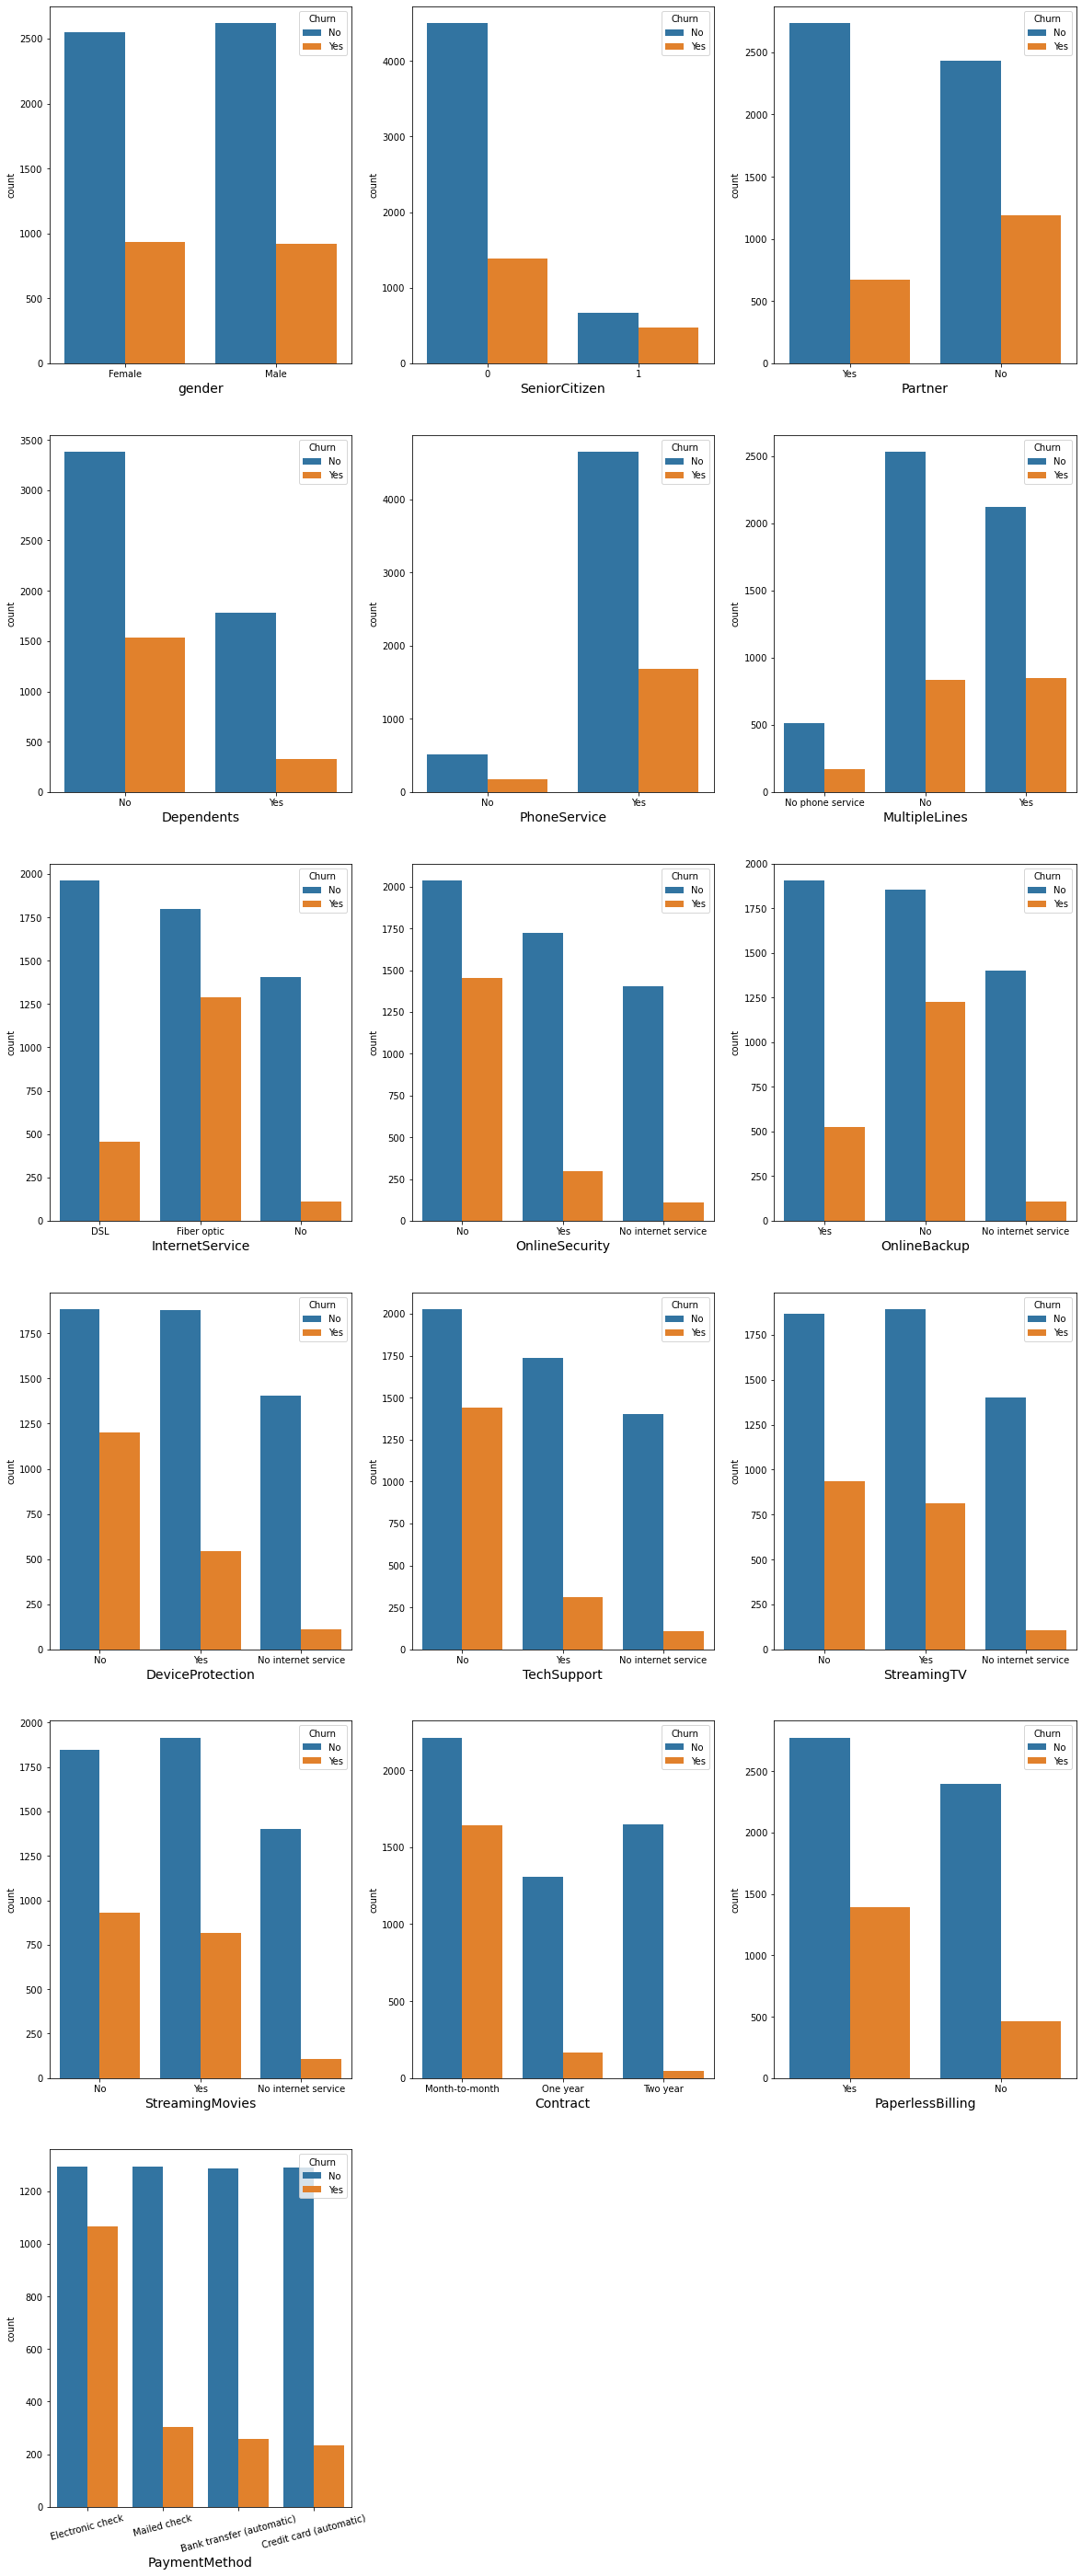

In [19]:
# Count-plots of our categorical features with respect to the target variable i.e 'Churn'.
plt.figure(figsize=(20,50))
plotnumber=1
for column in df_cat:
    if plotnumber<=16:
        ax= plt.subplot(6,3,plotnumber)
        sns.countplot(df[column],hue=df['Churn'])
        plt.xlabel(column,fontsize=14)
        if column == 'PaymentMethod':
            plt.xticks(rotation=15)
    plotnumber+=1
plt.show()

# Observations:
# 1. Churn rate is higher for people with no partner or dependents.
# 2. Churn rate is higher for customers using fibre-optic internet service.
# 3. Churn rate is higher for people with no online security, backup, device protection, and tech support.
# 4. Churn rate is higher for customers opting month-to-month contract and paperless billing.

# Encoding the categorical columns

In [20]:
# Encoding the other categorical object datatype columns using Label Encoder.
from sklearn.preprocessing import LabelEncoder
enc= LabelEncoder()

encode_features=['gender', 'Partner', 'Dependents','PhoneService', 'MultipleLines','InternetService','OnlineSecurity', 
                 'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','Contract','StreamingMovies','PaperlessBilling', 
                 'PaymentMethod','Churn']

for i in encode_features:
    df[i]= enc.fit_transform(df[[i]])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7021 entries, 0 to 7020
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   int32  
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   int32  
 3   Dependents        7021 non-null   int32  
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   int32  
 6   MultipleLines     7021 non-null   int32  
 7   InternetService   7021 non-null   int32  
 8   OnlineSecurity    7021 non-null   int32  
 9   OnlineBackup      7021 non-null   int32  
 10  DeviceProtection  7021 non-null   int32  
 11  TechSupport       7021 non-null   int32  
 12  StreamingTV       7021 non-null   int32  
 13  StreamingMovies   7021 non-null   int32  
 14  Contract          7021 non-null   int32  
 15  PaperlessBilling  7021 non-null   int32  
 16  PaymentMethod     7021 non-null   int32  


# Correlation

<AxesSubplot:>

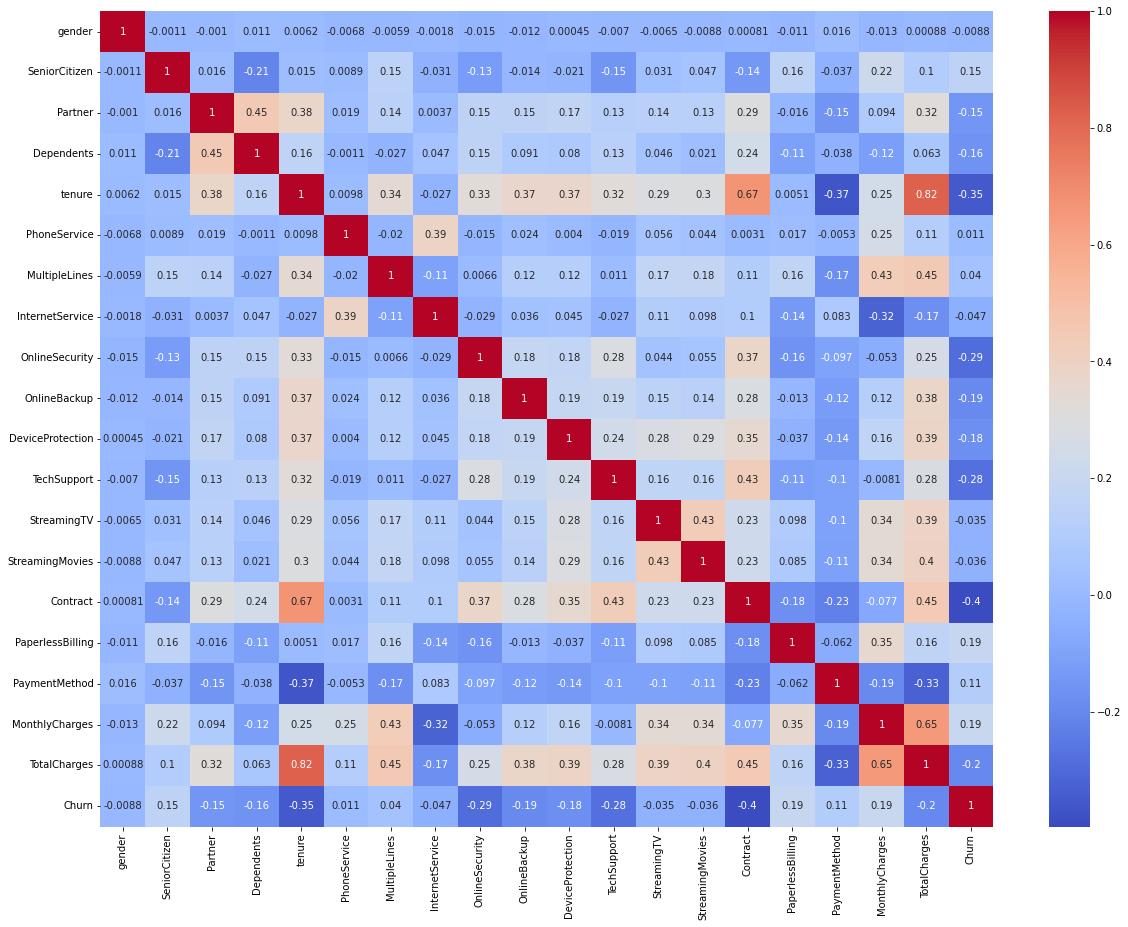

In [22]:
# Let's see the correlation heat-map.
corr=df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True, cmap="coolwarm")

# Observations:
# 1. 'TotalCharges' and 'tenure' might have a multicollinearity issue.

<AxesSubplot:xlabel='TotalCharges', ylabel='tenure'>

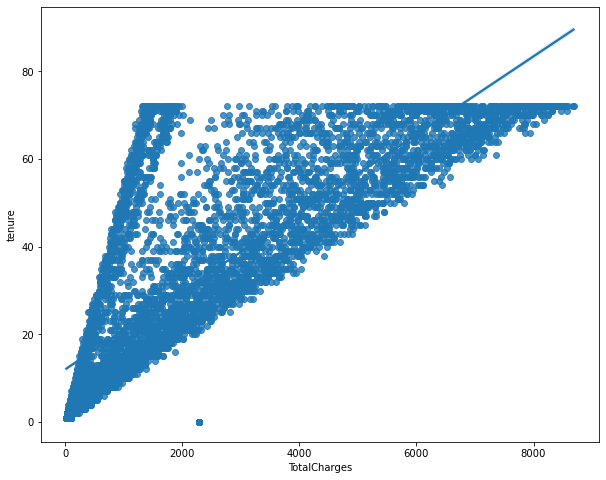

In [23]:
# Regplot of 'TotalCharges' vs 'tenure'.
plt.figure(figsize=(10,8))
sns.regplot(x='TotalCharges',y='tenure',data=df)

# Both have a positive linear relation.

# Data Transformation using Power Transformer

In [24]:
# check the skewness in continuous data columns.
df_cont.skew()

# 'TotalCharges' column have some skewness.

tenure            0.235542
MonthlyCharges   -0.224097
TotalCharges      0.959073
dtype: float64

In [25]:
# Let's apply power-transformation on the 'TotalCharges' column to bring down the skewnwess.
from sklearn.preprocessing import PowerTransformer
pt= PowerTransformer(method="yeo-johnson")
df['TotalCharges']= pt.fit_transform(df[['TotalCharges']])

df['TotalCharges'].skew()

-0.14382599268860016

# Feature Selection

In [26]:
# Let us see the correlation of various features with our target varibale.
np.abs(corr["Churn"]).sort_values(ascending= False)

# 'gender' have very weak relation with the target variable.

Churn               1.000000
Contract            0.396531
tenure              0.351508
OnlineSecurity      0.288505
TechSupport         0.281654
TotalCharges        0.198306
MonthlyCharges      0.194508
OnlineBackup        0.194214
PaperlessBilling    0.190891
DeviceProtection    0.176770
Dependents          0.163459
SeniorCitizen       0.151619
Partner             0.149135
PaymentMethod       0.106238
InternetService     0.047366
MultipleLines       0.040175
StreamingMovies     0.036492
StreamingTV         0.034591
PhoneService        0.011323
gender              0.008763
Name: Churn, dtype: float64

In [27]:
# Dropping it.
df.drop(columns=['gender'],inplace=True)

In [28]:
# Separating the features and label.
X= df.drop(columns=['Churn'])
y= df['Churn']

In [29]:
# applying standard scaler on the features and scaling them.
scaler= StandardScaler()
X_scaled= scaler.fit_transform(X)

In [30]:
# checking the variance-inflation-factor among our features.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]= X.columns
print(vif)

# 'TotalCharges' and 'tenure' have a multicollinearity issue.

          vif          Features
0    1.149520     SeniorCitizen
1    1.458929           Partner
2    1.383151        Dependents
3   10.686235            tenure
4    1.623007      PhoneService
5    1.394047     MultipleLines
6    1.860351   InternetService
7    1.251948    OnlineSecurity
8    1.188166      OnlineBackup
9    1.284293  DeviceProtection
10   1.308670       TechSupport
11   1.443941       StreamingTV
12   1.442243   StreamingMovies
13   2.508333          Contract
14   1.202051  PaperlessBilling
15   1.177265     PaymentMethod
16   4.798231    MonthlyCharges
17  13.662416      TotalCharges


In [31]:
# dropping the 'TotalCharges' column.
df.drop(columns=['TotalCharges'],inplace=True)

In [32]:
# After the drop operation we have to get the updated features in X and scale them.
# Separating the features and label.
X= df.drop(columns=['Churn'])
y= df['Churn']

# applying standard scaler on the features and scaling them.
scaler= StandardScaler()
X_scaled= scaler.fit_transform(X)

In [33]:
# Let's check the vif scores now.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]= X.columns
print(vif)

# No multicollinearity issues can be found.

         vif          Features
0   1.149447     SeniorCitizen
1   1.456838           Partner
2   1.381038        Dependents
3   2.739905            tenure
4   1.622878      PhoneService
5   1.388601     MultipleLines
6   1.820576   InternetService
7   1.246998    OnlineSecurity
8   1.185295      OnlineBackup
9   1.279395  DeviceProtection
10  1.303034       TechSupport
11  1.443015       StreamingTV
12  1.441483   StreamingMovies
13  2.458816          Contract
14  1.201734  PaperlessBilling
15  1.176705     PaymentMethod
16  2.729049    MonthlyCharges


# Classification Algorithms and their performance evaluation.

In [ ]:
# With the help of model we have to predict whether or not a customer is likely to churn.
# Since the identification of people likely to churn is critical hence we have to focus on increasing the recall score but at 
# the same time we cannot have a model with very less accuracy.
# A model with lesser false negatives and good accuracy is what is required in this case.
# By 'false negatives' I mean customers who are going to churn but are classified as not-churn.

In [34]:
# defining a function that takes the model and train data as arguements and shows the performance metrics for them.
def model_output(model,train_x,train_y):
    model.fit(train_x, train_y)
    y_pred= model.predict(x_test)
    y_pred= model.predict(x_test)
    accuracy_test = accuracy_score(y_test,y_pred)
    precision, recall, _= precision_recall_curve(y_test,y_pred)

    print("Testing Score:",round(accuracy_test*100,2))
    print("Precision:",round(precision_score(y_test,y_pred)*100,2))
    print("Recall:",round(recall_score(y_test,y_pred)*100,2))
    #print("PR AUC:",round(auc(recall,precision)*100,2))
    print("\n",confusion_matrix(y_test,y_pred))

In [35]:
# Since our target variable is moderately imbalanced hence using SMOTE oversampling technique.
from imblearn.over_sampling import SMOTE
over_sample= SMOTE(random_state=5)

In [36]:
############################################## LOGISTIC REGRESSION #############################################################

from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

for i in range(0,5):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=i,stratify=y)
    print(f'####################  Sample {i} Results #####################')
    x_train_ns,y_train_ns= over_sample.fit_resample(x_train,y_train)
    model_output(lr,x_train_ns,y_train_ns)
    print("\n")

####################  Sample 0 Results #####################
Testing Score: 75.11
Precision: 51.97
Recall: 76.72

 [[963 329]
 [108 356]]


####################  Sample 1 Results #####################
Testing Score: 75.57
Precision: 52.57
Recall: 77.16

 [[969 323]
 [106 358]]


####################  Sample 2 Results #####################
Testing Score: 73.58
Precision: 50.0
Recall: 78.02

 [[930 362]
 [102 362]]


####################  Sample 3 Results #####################
Testing Score: 74.89
Precision: 51.62
Recall: 78.88

 [[949 343]
 [ 98 366]]


####################  Sample 4 Results #####################
Testing Score: 77.16
Precision: 54.81
Recall: 77.37

 [[996 296]
 [105 359]]




In [42]:
############################################## RANDOM FOREST CLASSIFIER ########################################################

from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_jobs=-1,max_depth=5)

for i in range(0,5):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=i,stratify=y)
    print(f'####################  Sample {i} Results #####################')
    x_train_ns,y_train_ns= over_sample.fit_resample(x_train,y_train)
    model_output(rf,x_train_ns,y_train_ns)
    print("\n")

####################  Sample 0 Results #####################
Testing Score: 73.75
Precision: 50.21
Recall: 76.08

 [[942 350]
 [111 353]]


####################  Sample 1 Results #####################
Testing Score: 75.17
Precision: 52.05
Recall: 76.72

 [[964 328]
 [108 356]]


####################  Sample 2 Results #####################
Testing Score: 74.49
Precision: 51.15
Recall: 76.94

 [[951 341]
 [107 357]]


####################  Sample 3 Results #####################
Testing Score: 75.17
Precision: 51.96
Recall: 80.17

 [[948 344]
 [ 92 372]]


####################  Sample 4 Results #####################
Testing Score: 75.85
Precision: 52.96
Recall: 77.16

 [[974 318]
 [106 358]]




In [43]:
################################################## KNN CLASSIFIER ##############################################################

from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=7)

for i in range(0,5):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=i,stratify=y)
    print(f'####################  Sample {i}  #####################')
    x_train_ns,y_train_ns= over_sample.fit_resample(x_train,y_train)
    model_output(knn,x_train_ns,y_train_ns)
    print("\n")

####################  Sample 0  #####################
Testing Score: 68.85
Precision: 44.44
Recall: 71.55

 [[877 415]
 [132 332]]


####################  Sample 1  #####################
Testing Score: 67.31
Precision: 42.82
Recall: 70.69

 [[854 438]
 [136 328]]


####################  Sample 2  #####################
Testing Score: 68.17
Precision: 43.84
Recall: 72.84

 [[859 433]
 [126 338]]


####################  Sample 3  #####################
Testing Score: 69.87
Precision: 45.81
Recall: 76.51

 [[872 420]
 [109 355]]


####################  Sample 4  #####################
Testing Score: 69.59
Precision: 45.3
Recall: 72.63

 [[885 407]
 [127 337]]




In [44]:
############################################## SUPPORT VECTOR MACHINE ##########################################################

from sklearn.svm import SVC
svc= SVC(C=0.1)

for i in range(0,5):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=i,stratify=y)
    print(f'####################  Sample {i}  #####################')
    x_train_ns,y_train_ns= over_sample.fit_resample(x_train,y_train)
    model_output(svc,x_train_ns,y_train_ns)
    print("\n")

####################  Sample 0  #####################
Testing Score: 73.75
Precision: 50.21
Recall: 75.86

 [[943 349]
 [112 352]]


####################  Sample 1  #####################
Testing Score: 74.66
Precision: 51.4
Recall: 75.43

 [[961 331]
 [114 350]]


####################  Sample 2  #####################
Testing Score: 73.41
Precision: 49.79
Recall: 75.65

 [[938 354]
 [113 351]]


####################  Sample 3  #####################
Testing Score: 75.17
Precision: 52.05
Recall: 76.72

 [[964 328]
 [108 356]]


####################  Sample 4  #####################
Testing Score: 76.14
Precision: 53.45
Recall: 75.22

 [[988 304]
 [115 349]]




In [45]:
################################################# ADABOOST CLASSIFIER ##########################################################

from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()

for i in range(0,5):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=i,stratify=y)
    print(f'####################  Sample {i}  #####################')
    x_train_ns,y_train_ns= over_sample.fit_resample(x_train,y_train)
    model_output(ada,x_train_ns,y_train_ns)
    print("\n")

####################  Sample 0  #####################
Testing Score: 75.8
Precision: 53.16
Recall: 70.69

 [[1003  289]
 [ 136  328]]


####################  Sample 1  #####################
Testing Score: 76.59
Precision: 54.27
Recall: 72.63

 [[1008  284]
 [ 127  337]]


####################  Sample 2  #####################
Testing Score: 75.28
Precision: 52.34
Recall: 72.2

 [[987 305]
 [129 335]]


####################  Sample 3  #####################
Testing Score: 76.99
Precision: 54.66
Recall: 75.86

 [[1000  292]
 [ 112  352]]


####################  Sample 4  #####################
Testing Score: 78.82
Precision: 57.93
Recall: 72.41

 [[1048  244]
 [ 128  336]]




In [47]:
################################################# XGBOOST CLASSIFIER ##########################################################

from xgboost import XGBClassifier
xgb_clf= XGBClassifier()

for i in range(0,5):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=i,stratify=y)
    print(f'####################  Sample {i}  #####################')
    x_train_ns,y_train_ns= over_sample.fit_resample(x_train,y_train)
    model_output(xgb_clf,x_train_ns,y_train_ns)
    print("\n")

####################  Sample 0  #####################
Testing Score: 76.94
Precision: 56.32
Recall: 56.68

 [[1088  204]
 [ 201  263]]


####################  Sample 1  #####################
Testing Score: 77.33
Precision: 57.47
Recall: 54.74

 [[1104  188]
 [ 210  254]]


####################  Sample 2  #####################
Testing Score: 76.14
Precision: 54.68
Recall: 56.68

 [[1074  218]
 [ 201  263]]


####################  Sample 3  #####################
Testing Score: 79.1
Precision: 59.68
Recall: 64.44

 [[1090  202]
 [ 165  299]]


####################  Sample 4  #####################
Testing Score: 79.44
Precision: 61.84
Recall: 57.97

 [[1126  166]
 [ 195  269]]




# Cross-Validation using StratifiedKFold

In [48]:
# defining a function that takes train, test data and the model and returns the recall_score.
def training(train, test, model):
    x_train = train.drop(['Churn'],axis=1)
    y_train = train.Churn
    x_test = test.drop(['Churn'],axis=1)
    y_test = test.Churn
    x_train_ns,y_train_ns= over_sample.fit_resample(x_train,y_train)
    
    model.fit(x_train_ns, y_train_ns)
    y_pred= model.predict(x_test)
    score = recall_score(y_test,y_pred)
    return score

In [49]:
# cross-validating the logistic regression model.
for i in range(5,11):
    skf= StratifiedKFold(n_splits=i)
    fold_no = 1
    scores=[]
    for train_index,test_index in skf.split(X_scaled, y):
        train = df.iloc[train_index,:]
        test = df.iloc[test_index,:]
        get_score= training(train, test, lr)
        scores.append(get_score)
        fold_no += 1
    avg_score= sum(scores)/len(scores)
    print(f'For {i}-Fold the recall is {avg_score}')

For 5-Fold the recall is 0.7490537054748861
For 6-Fold the recall is 0.7506768277829975
For 7-Fold the recall is 0.7474717791784042
For 8-Fold the recall is 0.7496092015687434
For 9-Fold the recall is 0.7496078462027528
For 10-Fold the recall is 0.747489102005231


In [50]:
# cross-validating the Random-Forests model.
for i in range(5,11):
    skf= StratifiedKFold(n_splits=i)
    fold_no = 1
    scores=[]
    for train_index,test_index in skf.split(X_scaled, y):
        train = df.iloc[train_index,:]
        test = df.iloc[test_index,:]
        get_score= training(train, test, rf)
        scores.append(get_score)
        fold_no += 1
    avg_score= sum(scores)/len(scores)
    print(f'For {i}-Fold the recall is {avg_score}')

For 5-Fold the recall is 0.7754354693794743
For 6-Fold the recall is 0.7749225736854926
For 7-Fold the recall is 0.7711610562795127
For 8-Fold the recall is 0.7786947794879384
For 9-Fold the recall is 0.7749089317261542
For 10-Fold the recall is 0.7700959023539669


In [51]:
# cross-validating the KNN model.
for i in range(5,11):
    skf= StratifiedKFold(n_splits=i)
    fold_no = 1
    scores=[]
    for train_index,test_index in skf.split(X_scaled, y):
        train = df.iloc[train_index,:]
        test = df.iloc[test_index,:]
        get_score= training(train, test, knn)
        scores.append(get_score)
        fold_no += 1
    avg_score= sum(scores)/len(scores)
    print(f'For {i}-Fold the recall is {avg_score}')

For 5-Fold the recall is 0.7501246268440426
For 6-Fold the recall is 0.7506663882799178
For 7-Fold the recall is 0.7361267049024177
For 8-Fold the recall is 0.748547802279118
For 9-Fold the recall is 0.7630635419435194
For 10-Fold the recall is 0.745850043591979


In [52]:
# cross-validating the SVC model.
for i in range(5,11):
    skf= StratifiedKFold(n_splits=i)
    fold_no = 1
    scores=[]
    for train_index,test_index in skf.split(X_scaled, y):
        train = df.iloc[train_index,:]
        test = df.iloc[test_index,:]
        get_score= training(train, test, svc)
        scores.append(get_score)
        fold_no += 1
    avg_score= sum(scores)/len(scores)
    print(f'For {i}-Fold the recall is {avg_score}')

For 5-Fold the recall is 0.7479697417615859
For 6-Fold the recall is 0.7501426732087553
For 7-Fold the recall is 0.7366921346492916
For 8-Fold the recall is 0.7404612808938879
For 9-Fold the recall is 0.7469109745738423
For 10-Fold the recall is 0.7485498401627434


In [53]:
# cross-validating the Adaboost model.
for i in range(5,11):
    skf= StratifiedKFold(n_splits=i)
    fold_no = 1
    scores=[]
    for train_index,test_index in skf.split(X_scaled, y):
        train = df.iloc[train_index,:]
        test = df.iloc[test_index,:]
        get_score= training(train, test, AdaBoostClassifier())
        scores.append(get_score)
        fold_no += 1
    avg_score= sum(scores)/len(scores)
    print(f'For {i}-Fold the recall is {avg_score}')

For 5-Fold the recall is 0.7463553893864301
For 6-Fold the recall is 0.7399223996937745
For 7-Fold the recall is 0.7399306892568348
For 8-Fold the recall is 0.7447716257214742
For 9-Fold the recall is 0.744216708618003
For 10-Fold the recall is 0.7415693112467308


In [54]:
# cross-validating the XGBoost model.
for i in range(5,11):
    skf= StratifiedKFold(n_splits=i)
    fold_no = 1
    scores=[]
    for train_index,test_index in skf.split(X_scaled, y):
        train = df.iloc[train_index,:]
        test = df.iloc[test_index,:]
        get_score= training(train, test, XGBClassifier())
        scores.append(get_score)
        fold_no += 1
    avg_score= sum(scores)/len(scores)
    print(f'For {i}-Fold the recall is {avg_score}')

For 5-Fold the recall is 0.6154957539924065
For 6-Fold the recall is 0.6209016250826461
For 7-Fold the recall is 0.6106823662930912
For 8-Fold the recall is 0.6128158761284594
For 9-Fold the recall is 0.6171093705214994
For 10-Fold the recall is 0.6139174658529498


In [ ]:
# From the cross-validation results, we can see that Random-Forests is giving the best results in terms of recall. 
# Let's cross validate it's accuracy score

In [55]:
# defining a function that takes train, test data and the model and returns the accuracy-score.
def training_acc(train, test, model):
    x_train = train.drop(['Churn'],axis=1)
    y_train = train.Churn
    x_test = test.drop(['Churn'],axis=1)
    y_test = test.Churn
    x_train_ns,y_train_ns= over_sample.fit_resample(x_train,y_train)
    
    model.fit(x_train_ns, y_train_ns)
    y_pred= model.predict(x_test)
    score = accuracy_score(y_test,y_pred)
    return score

In [56]:
# cross-validating the accuracy of Random-Forests model.
for i in range(5,11):
    skf= StratifiedKFold(n_splits=i)
    fold_no = 1
    scores=[]
    for train_index,test_index in skf.split(X_scaled, y):
        train = df.iloc[train_index,:]
        test = df.iloc[test_index,:]
        get_score= training_acc(train, test, rf)
        scores.append(get_score)
        fold_no += 1
    avg_score= sum(scores)/len(scores)
    print(f'For {i}-Fold the accuracy is {avg_score}')

For 5-Fold the accuracy is 0.7528834747695956
For 6-Fold the accuracy is 0.752314601930315
For 7-Fold the accuracy is 0.7527417746759719
For 8-Fold the accuracy is 0.7527415370789319
For 9-Fold the accuracy is 0.7520293217476316
For 10-Fold the accuracy is 0.7501777080724449


# Hyperparameter Tuning

In [57]:
#Hyperparameter tuning of RandomForests model using GridSearchCV.
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=3,stratify=y)
params= {"n_estimators": [100,250,500,1000],
         "max_depth":[3,5,7,9],       
         "criterion":['gini','entropy'],
         "min_samples_split":[2,3,4] 
         }
grd_rf= GridSearchCV(rf, param_grid=params,cv=5,n_jobs=-1,scoring=make_scorer(recall_score))
grd_rf.fit(x_train,y_train)
print("Best Parameters:",grd_rf.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 250}


In [58]:
# Performance of the tuned Random-Forests model on a train-test split.

x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=3,stratify=y)
rf_tuned = grd_rf.best_estimator_
x_train_ns,y_train_ns=over_sample.fit_resample(x_train,y_train)
rf_tuned.fit(x_train_ns, y_train_ns)
    
y_pred= rf_tuned.predict(x_test)
accuracy_test = accuracy_score(y_test,y_pred)
print("Testing Score:",round(accuracy_test*100,2))
print("Recall:",round(recall_score(y_test,y_pred)*100,2),"\n")

print("++++++++++++++ CLASSIFICATION REPORT ++++++++++++++++","\n")
print(classification_report(y_test,y_pred,digits=2))

print("++++++++++++++ CONFUSION MATRIX ++++++++++++++++")
print("\n",confusion_matrix(y_test,y_pred),"\n")

Testing Score: 75.51
Recall: 80.39 

++++++++++++++ CLASSIFICATION REPORT ++++++++++++++++ 

              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1292
           1       0.52      0.80      0.63       464

    accuracy                           0.76      1756
   macro avg       0.72      0.77      0.73      1756
weighted avg       0.81      0.76      0.77      1756

++++++++++++++ CONFUSION MATRIX ++++++++++++++++

 [[953 339]
 [ 91 373]] 



In [59]:
# cross-validating the recall of tuned random-forests model.
for i in range(5,11):
    skf= StratifiedKFold(n_splits=i)
    fold_no = 1
    scores=[]
    for train_index,test_index in skf.split(X_scaled, y):
        train = df.iloc[train_index,:]
        test = df.iloc[test_index,:]
        get_score= training(train, test, rf_tuned)
        scores.append(get_score)
        fold_no += 1
    avg_score= sum(scores)/len(scores)
    print(f'For {i}-Fold the recall is {avg_score}')

For 5-Fold the recall is 0.7706054545981508
For 6-Fold the recall is 0.7733061906253264
For 7-Fold the recall is 0.77061589283181
For 8-Fold the recall is 0.7727749926002664
For 9-Fold the recall is 0.771161973849465
For 10-Fold the recall is 0.7787154896832316


In [61]:
# cross-validating the accuracy of tuned random-Forests model.
for i in range(5,11):
    skf= StratifiedKFold(n_splits=i)
    fold_no = 1
    scores=[]
    for train_index,test_index in skf.split(X_scaled, y):
        train = df.iloc[train_index,:]
        test = df.iloc[test_index,:]
        get_score= training_acc(train, test, rf_tuned)
        scores.append(get_score)
        fold_no += 1
    avg_score= sum(scores)/len(scores)
    print(f'For {i}-Fold the accuracy is {avg_score}')

For 5-Fold the accuracy is 0.7521713254453468
For 6-Fold the accuracy is 0.7534540814216305
For 7-Fold the accuracy is 0.752741774675972
For 8-Fold the accuracy is 0.7504623340597345
For 9-Fold the accuracy is 0.7501772875012311
For 10-Fold the accuracy is 0.7497507629086575


# Save the model using pickle

In [62]:
import pickle 

Churn= "Customer_Churn_model.pickle"
pickle.dump(rf_tuned, open(Churn,'wb'))